In [1]:
import numpy as np
from numpy import inner,sqrt,sin,cos,arctan2,pi,add,array,zeros,sum,arccos,log,arctan,linspace
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

First, lets get familar with the random number generator
==

We use Numpy's random number generator (rng, imported above).  

This is a random number between 0 and 1: 0.29574312419002535
This is two random numbers between 0 and 1: 0.769492413125298 0.615372000881714
This is a random number between s and t: 5.015532919924183
This is a histogram of 1000 random numbers between 0 and 1 using 10 bins:


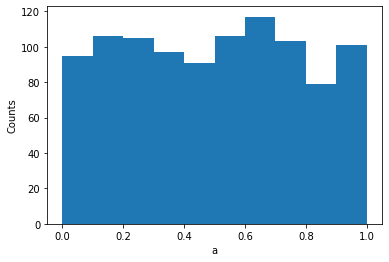

In [2]:
a = rng.random()
print("This is a random number between 0 and 1:",a)

a = rng.random(2)
print("This is two random numbers between 0 and 1:",a[0],a[1])

s=5.0
t=5.8
a = s + rng.random()*(t-s)
print("This is a random number between s and t:",a)

a = rng.random(1000)
print("This is a histogram of 1000 random numbers between 0 and 1 using 10 bins:")
plt.hist(a,bins=10)
plt.xlabel("a")
plt.ylabel("Counts")
plt.show()

Sampling Distriubtions
==

Often we want to sample distributions other than the uniform distribution from 0 to 1.  Above we have done a uniform distribution from s to t by scaling the output of the uniform distribution from 0 to 1.  We can do non uniform distributions to.

Example, pick two random numbers in the range and domain of a function.  So for f(x) = sin^2(x), choose a random x between 0 and pi, and a random y between min(f(x)) and max(f(x)).  If this (x,y) is less than (x,f(x)), use x as your random sample from the distribution.  If not, pick another random x and y and repeat until a pair works.

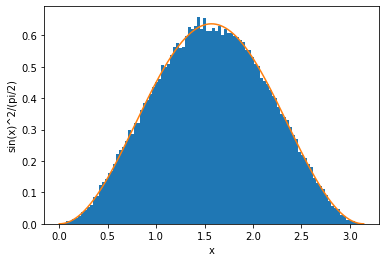

In [3]:
a = zeros(100000)
for i in range(len(a)):
    x = rng.random()*pi
    y = rng.random()
    while y>sin(x)**2:
        x = rng.random()*pi
        y = rng.random()            
    a[i]=x
plt.hist(a,bins=100,density=True)
plt.plot(np.linspace(0,np.pi,1000),2.0/pi*sin(np.linspace(0,np.pi,1000))**2)
plt.xlabel("x")
plt.ylabel("sin(x)^2/(pi/2)")
plt.show()

Let's define a function for easy use

A single value between 0 and pi weigthed by sin2: 1.675277501824458


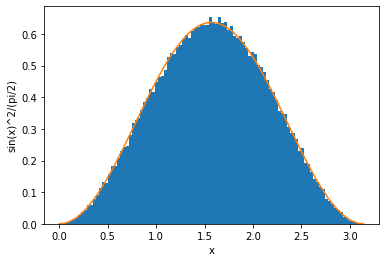

In [4]:
def random_sin2():
    x = rng.random()*pi
    y = rng.random()
    while y>sin(x)**2:
        x = rng.random()*pi
        y = rng.random()            
    return x

print("A single value between 0 and pi weigthed by sin2:", random_sin2())

a = array([ random_sin2() for x in range(100000) ])

plt.hist(a,bins=100,density=True)
plt.plot(np.linspace(0,np.pi,1000),2.0/pi*sin(np.linspace(0,np.pi,1000))**2)
plt.xlabel("x")
plt.ylabel("sin(x)^2/(pi/2)")
plt.show()

Random Velocities in 3-space (i.e. isotropic emission)
==

You may think in order to get a random velocities you could choose three random numbers (x,y,z) between -1 and 1, and then normalize the resulting vector.  This however, is incorrect.  It is not uniform.  One way to do it is to choose two random angles, a random phi between 0 and 2*pi and a random cost(theta) between -1 and 1 (note, not a random theta between 0 and pi, that is a different distribution).



A random direction in 3-space is: [ 0.92210647  0.27889777 -0.2682083 ]
The phi is  0.2937096059517017  and the costheta is  -0.2682082973541051


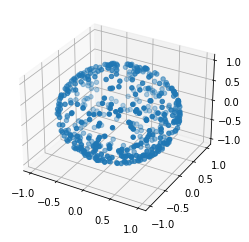

In [5]:
phi = rng.random()*2.0*pi #uniform random between 0 and 2pi
costheta = 2.0*rng.random()-1.0 #unifrom random between -1 and 1
sintheta = sqrt(1.0-costheta**2) #need sin(theta) for the cartesian cordinates
direction = array([sintheta*cos(phi),sintheta*sin(phi),costheta])
print("A random direction in 3-space is:",direction)
print("The phi is ",phi," and the costheta is ",costheta)

def random_direction():
    phi = rng.random()*2.0*pi #uniform random between 0 and 2pi
    costheta = 2.0*rng.random()-1.0 #unifrom random between -1 and 1
    sintheta = sqrt(1.0-costheta**2) #need sin(theta) for the cartesian cordinates
    return array([sintheta*cos(phi),sintheta*sin(phi),costheta])
    
a = array([ random_direction() for x in range(500) ])

ax = plt.axes(projection='3d')
ax.scatter3D(a.T[0],a.T[1],a.T[2])
plt.show()


Python Objects
==

Next we'll make some basic classes to make transporting MC photons easier

In [6]:
#for example, a photon class.  From this class we can make a photon
#object and change its properties as it moves around.  The photon
#will have a position, direction, and polarization
class Photon:
    def __init__(self,init_pos=None,init_vel=None):
        #if not specified, set initial position to origin
        self.pos = init_pos if init_pos is not None else array([0.0,0.0,0.0])

        #if not specified, assume isotropic
        #photons will travel with speed c=1
        self.vel = init_vel if init_vel is not None else random_direction() 

        #polarization is perpendicular to vel.
        #Find two vectors perp to vel, then take random 
        pvec = random_direction() 
        #pvec cross vel will be perp to vel.
        pvec1=zeros(3)
        pvec1[0] = pvec[1]*self.vel[2]-pvec[2]*self.vel[1]
        pvec1[1] = -(pvec[0]*self.vel[2]-pvec[2]*self.vel[0])
        pvec1[2] = pvec[0]*self.vel[1]-pvec[1]*self.vel[0]
        pvec1 /= sqrt(inner(pvec1,pvec1)) #normalize

        #pvec1 cross vel will be perp to vel and pvec1
        pvec2=zeros(3)
        pvec2[0] = pvec1[1]*self.vel[2]-pvec1[2]*self.vel[1]
        pvec2[1] = -(pvec1[0]*self.vel[2]-pvec1[2]*self.vel[0])
        pvec2[2] = pvec1[0]*self.vel[1]-pvec1[1]*self.vel[0]
        pvec2 /= sqrt(inner(pvec2,pvec2)) #normalize

        angle = rng.random()*2.0*pi
        self.pol = add(pvec1*cos(angle),pvec2*sin(angle))
        self.pol /= sqrt(inner(self.pol,self.pol))

    #return the current speed  = norm(vel)
    def speed(self):
        return sqrt(inner(self.vel,self.vel))

    #propagate the photon a time dt, update the position.
    def move(self,dt):
        self.pos += self.vel*dt

    #scatter the photon into new direction, need to be careful with the new polarization
    #after a scatter into new direction, the new polarization will be perp
    #to the new direction, and parallel to the old polarization
    def scatter(self,new_direction):
        newpol = self.pol - inner(new_direction,self.pol)*new_direction
        newpol /= sqrt(inner(newpol,newpol))
        
        self.vel = new_direction
        self.pol = newpol
        


In [7]:
test_photon = Photon()
print("The position of the photon is:",test_photon.pos)
print("The velocity of the photon is:",test_photon.vel,"with a speed:",test_photon.speed())
print("The polarization of the photon is:",test_photon.pol)
print("As a check, the velocity and polarization are perpendicular:",inner(test_photon.vel,test_photon.pol))

#move the photon either through a time dt
test_photon.move(0.1)
print("Moved. The position is now:",test_photon.pos)

#scatter the photon into a random direction (note, not Thomson scattering)
test_photon.scatter(random_direction())
print("Scattered. The velocity of the photon is:",test_photon.vel,"with a speed:",test_photon.speed())
print("The polarization of the photon is:",test_photon.pol)
print("As a check, the velocity and polarization are perpendicular:",inner(test_photon.vel,test_photon.pol))

The position of the photon is: [0. 0. 0.]
The velocity of the photon is: [-0.25602036 -0.73626788  0.626389  ] with a speed: 1.0
The polarization of the photon is: [ 0.00390301 -0.6487675  -0.76097667]
As a check, the velocity and polarization are perpendicular: 5.551115123125783e-17
Moved. The position is now: [-0.02560204 -0.07362679  0.0626389 ]
Scattered. The velocity of the photon is: [ 0.58302748 -0.09357082  0.80704613] with a speed: 1.0
The polarization of the photon is: [ 0.38979661 -0.83933563 -0.37891199]
As a check, the velocity and polarization are perpendicular: 0.0
